In [2]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import fiona
import math
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
auxiliary_dataset_gdb=r'J:\lakemapping\auxiliary_dataset.gdb'
merge_gdb=os.path.join(output_dir,f'5_polygon_afm_mergeWith_GLAKES_PLD.gdb')
output_c_csv_dir=os.path.join(output_dir,f'5_GLAKES_plus_csv')
os.makedirs(output_c_csv_dir,exist_ok=True)
# eight_continents=['Asia','Siberia','Africa','Europe','Oceania_Anta','North_America','Arctic','South_America']
eight_continents=['Asia','Siberia','Africa','Europe','Oceania','North_America','Arctic','South_America']
fig_path=r'D:\lakemapping\10_paper_writting\figure\v6_250321'

In [4]:
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'out'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'inout'#将y轴的刻度方向设置向内

In [5]:
GLAKES_afm_dir=r'D:\lakemapping\0_auxiliary_data\GLAKES\GLAKES_after_30p_land_mask.gdb'
layers = fiona.listlayers(GLAKES_afm_dir)
desired_columns = ['Area_bound'] 
print(layers)

['au2_GLAKES_iwSHIFT_after_mask_gt3ha', 'au1_GLAKES_iwSHIFT', 'au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_semi', 'au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid', 'au1_GLAKES_land_mask_iwSHIFT_SJ_land_mask', 'au1_GLAKES_land_mask_iwSHIFT', 'au1_GLAKES_niwSHIFT', 'au1_GLAKES_land_mask_supplement', 'au2_niwSHIFT_supplement_after_mask', 'au2_niwSHIFT_supplement_after_mask_singlepart', 'au1_GLAKES_iwSHIFT_point']


In [6]:
output_csv_dir=r'D:\lakemapping\0_auxiliary_data\GLAKES\GLAKES_after_floodplain_mask_stastics'
layer_name=['au1_GLAKES_niwSHIFT','au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid']
# for layer in layers:
#     if layer ==layer_name[0]:
#         print(f"正在处理图层: {layer}")
#         gdf = gpd.read_file(GLAKES_afm_dir, layer=layer)
#         filtered_gdf = gdf[desired_columns]
#         output_file = os.path.join(output_csv_dir, f"{layer}.csv")
#         filtered_gdf.to_csv(output_file, index=False)
#         print(f"图层 {layer} 已保存为 {output_file}")
        
# 定义湖泊面积的bins（区间）
poww=range(-2,7)
bins = [10**i for i in poww]
print(bins)
bin_labels = bins[1:]
print(bin_labels)
results = pd.DataFrame(columns=layer_name)
out_csv=os.path.join(output_csv_dir, f"GLAKES_afm_count.csv")
for file in layer_name:
    file_dir=os.path.join(output_csv_dir,file+'.csv')
    df = pd.read_csv(file_dir)
    area_binned = pd.cut(df[desired_columns].squeeze(), bins=bins, labels=bin_labels, right=False)
#     area_sum_by_bin = df.groupby(area_binned)[desired_columns].sum()
    area_sum_by_bin = df.groupby(area_binned)[desired_columns].count()
    results[file] = area_sum_by_bin.reindex(bin_labels, fill_value=0)

# 将结果保存为 CSV 文件
results.to_csv(out_csv)


[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]


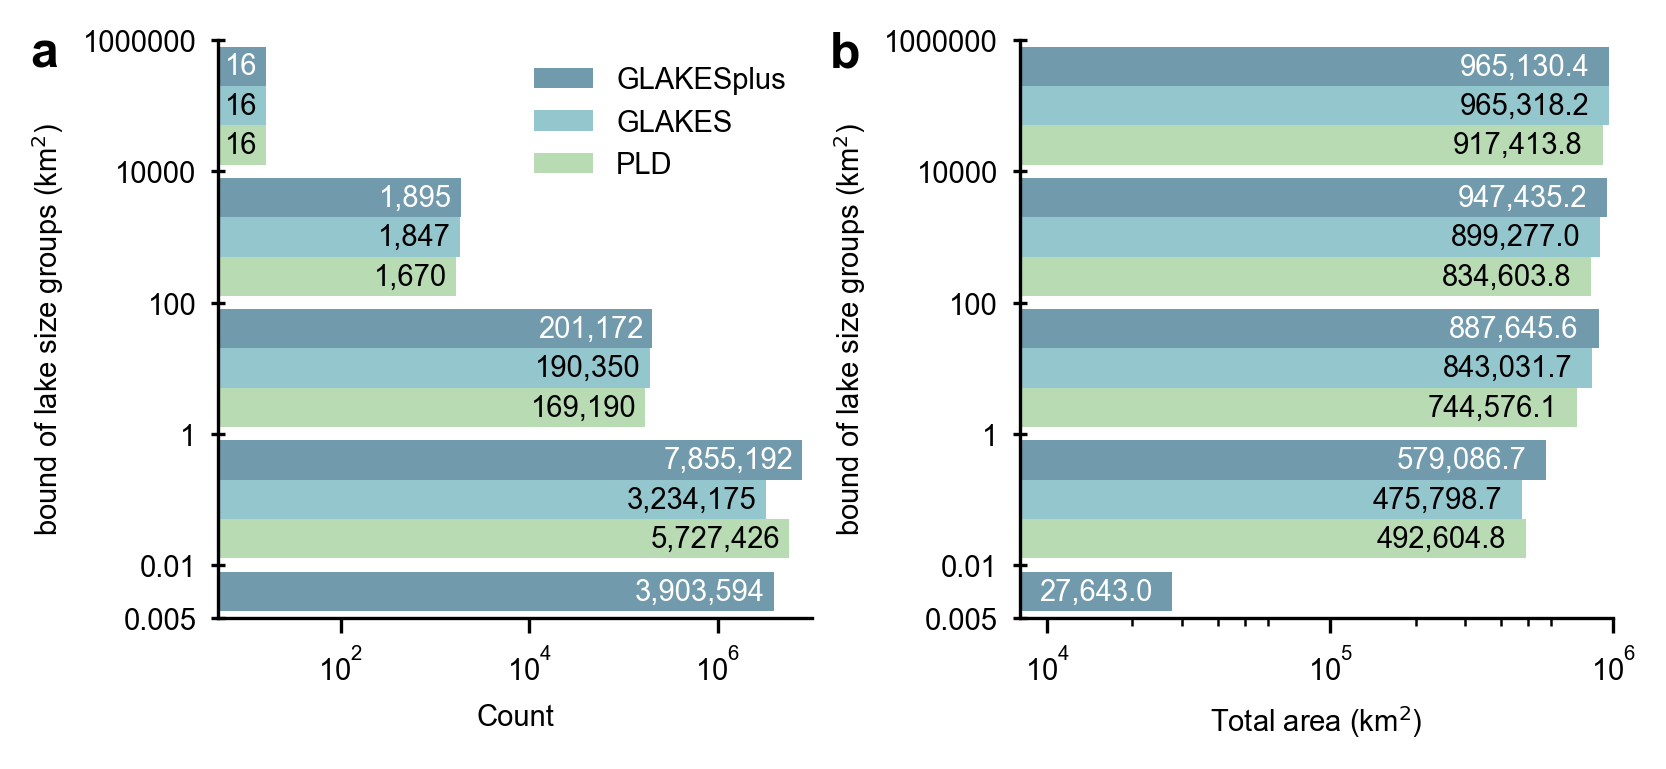

In [7]:
# savepic=os.path.join(fig_path,'3-1 count and total area of lakes across decadal area size.png')
savepic=os.path.join(fig_path,'Figure7 comparison of three database.png')
data_dir=r'D:\lakemapping\10_paper_writting\figure'
color_list=['#a51c36','#4485c7','#dbb428','#7abbdb','#84ba42','#d4562e','#682487']
# 读取 Excel 文件中的两个 sheet
file_path = os.path.join(data_dir,'dataset_distribution.xlsx')
world_df = pd.read_excel(file_path, sheet_name='three_dataset_comparison')
bins = [0.005]
for i in [-2,0,2,4,6]:
    bins.append(10**i)

fig=plt.figure(figsize=(6,2.5),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2,width_ratios=[1,1],wspace =0.35,hspace =0.01)
bar_height=0.3
ax=plt.subplot(gs[0, 0])
bars=ax.barh(np.arange(0.8,5.8,1),world_df['GLAKESplus_count'],bar_height,label='GLAKESplus',color='#719AAC')
# bars_G=ax.barh(np.arange(1.275,9.275,1),GLAKES_afm_df['Count'],bar_height,label='GLAKES_after_flood_mask',color='#719AAC')
bars_G=ax.barh(np.arange(0.5,5.5,1),world_df['GLAKES_count'],bar_height,label='GLAKES',color='#94C6CD')
bars_P=ax.barh(np.arange(0.2,5.2,1),world_df['PLD_count'],bar_height,label='PLD',color='#B8DBB3')
# 设置图表标题和标签
ax.set_xlabel('Count')
ax.set_xlim(5,10000000)
ax.set_xscale('log',base=10,subs=range(1,8))
ax.set_ylim(0.6,5)
ax.set_ylabel('bound of lake size groups (km$^2$)')
ax.set_yticks([0.6,1,2,3,4,5])
ax.set_yticklabels(bins) 
ax.text(0.05,4.8,'a',fontsize=12,weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=1,frameon=False)

for bar in bars:
    width=bar.get_width()
    ax.text(width*0.8,bar.get_y() + bar.get_height() / 2,  f'{int(width):,}',ha='right',va='center',color='w')#width*0.85,
for bar in bars_P[1:]:
    width=bar.get_width()
    ax.text(width*0.8,bar.get_y() + bar.get_height() / 2,  f'{int(width):,}',ha='right',va='center',color='k')
for bar in bars_G[1:]:
    width=bar.get_width()
    ax.text(width*0.8,bar.get_y() + bar.get_height() / 2,  f'{int(width):,}',ha='right',va='center',color='k')
    
ax=plt.subplot(gs[0, 1])
bars=ax.barh(np.arange(0.8,5.8,1),world_df['GLAKESplus_area'],bar_height,label='GLAKES_plus',color='#719AAC')
# bars_G=ax.barh(np.arange(1.275,9.275,1),GLAKES_afm_df['Count'],bar_height,label='GLAKES_after_flood_mask',color='#719AAC')
bars_G=ax.barh(np.arange(0.5,5.5,1),world_df['GLAKES_area'],bar_height,label='GLAKES',color='#94C6CD')
bars_P=ax.barh(np.arange(0.2,5.2,1),world_df['PLD_area'],bar_height,label='PLD',color='#B8DBB3')

# 设置图表标题和标签
ax.set_xlabel('Total area (km$^2$)')
ax.set_xscale('log',base=10,subs=range(0,7))
ax.set_xlim(8000,1000000)
ax.set_ylim(0.6,5)
ax.set_ylabel('bound of lake size groups (km$^2$)')
ax.set_yticks([0.6,1,2,3,4,5])
ax.set_yticklabels(bins) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(1700,4.8,'b',fontsize=12,weight='bold')
# ax.legend(ncols=1,frameon=False)
# poww=range(-3,7)
# bins = [10**i for i in poww]
# ax.set_yticklabels(bins[1:-1]) 
for bar in bars:
    width=bar.get_width()
    ax.text(width*0.85,bar.get_y() + bar.get_height() / 2,  f'{width:,.1f}',ha='right',va='center',color='w')
for bar in bars_P[1:]:
    width=bar.get_width()
    ax.text(width*0.85,bar.get_y() + bar.get_height() / 2,  f'{width:,.1f}',ha='right',va='center',color='k')
for bar in bars_G[1:]:
    width=bar.get_width()
    ax.text(width*0.85,bar.get_y() + bar.get_height() / 2,  f'{width:,.1f}',ha='right',va='center',color='k')
    
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
# 显示图表
plt.show()


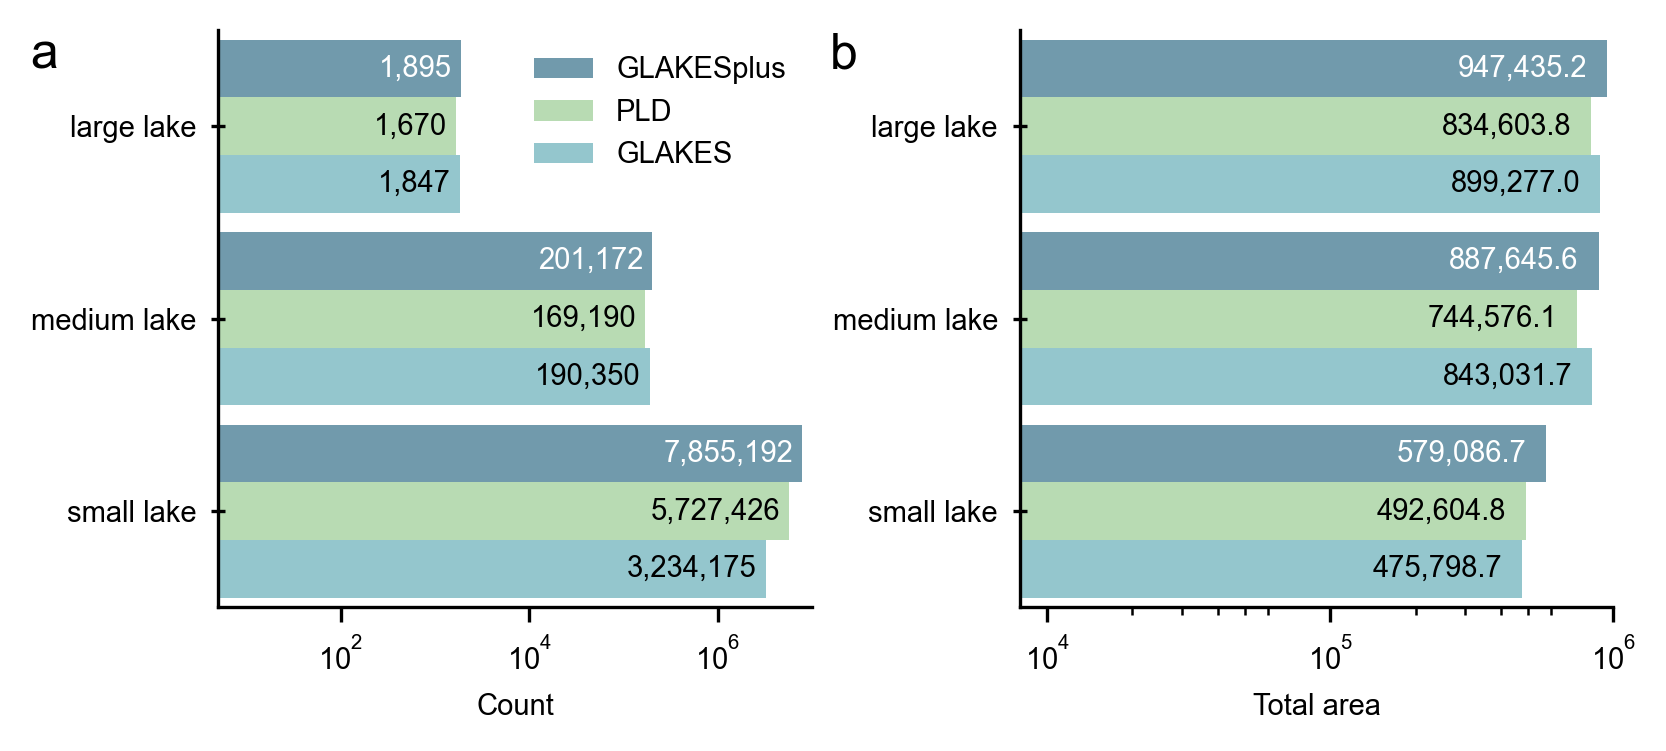

In [8]:
savepic=os.path.join(fig_path,'3-1 count and total area of lakes in three database.png')
data_dir=r'D:\lakemapping\10_paper_writting\figure'
color_list=['#a51c36','#4485c7','#dbb428','#7abbdb','#84ba42','#d4562e','#682487']
# 读取 Excel 文件中的两个 sheet
file_path = os.path.join(data_dir,'dataset_distribution.xlsx')
world_df = pd.read_excel(file_path, sheet_name='three_dataset_comparison')
bins = [0.005]
for i in [-2,0,2,4,6]:
    bins.append(10**i)

fig=plt.figure(figsize=(6,2.5),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2,width_ratios=[1,1],wspace =0.35,hspace =0.01)
bar_height=0.3
ax=plt.subplot(gs[0, 0])
bars=ax.barh(np.arange(0.8,3.8,1),world_df['GLAKESplus_count'][1:-1],bar_height,label='GLAKESplus',color='#719AAC')
bars_P=ax.barh(np.arange(0.5,3.5,1),world_df['PLD_count'][1:-1],bar_height,label='PLD',color='#B8DBB3')
bars_G=ax.barh(np.arange(0.2,3.2,1),world_df['GLAKES_count'][1:-1],bar_height,label='GLAKES',color='#94C6CD')

# 设置图表标题和标签
ax.set_xlabel('Count')
ax.set_xlim(5,10000000)
ax.set_xscale('log',base=10,subs=range(1,8))
ax.set_ylim(0,3)
# ax.set_ylabel('lake groups (km$^2$)')
ax.set_yticks([0.5,1.5,2.5])
ax.set_yticklabels(['small lake','medium lake','large lake']) 
ax.text(0.05,2.8,'a',fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=1,frameon=False)

for bar in bars:
    width=bar.get_width()
    ax.text(width*0.8,bar.get_y() + bar.get_height() / 2,  f'{int(width):,}',ha='right',va='center',color='w')#width*0.85,
for bar in bars_P:
    width=bar.get_width()
    ax.text(width*0.8,bar.get_y() + bar.get_height() / 2,  f'{int(width):,}',ha='right',va='center',color='k')
for bar in bars_G:
    width=bar.get_width()
    ax.text(width*0.8,bar.get_y() + bar.get_height() / 2,  f'{int(width):,}',ha='right',va='center',color='k')
    
ax=plt.subplot(gs[0, 1])
bars=ax.barh(np.arange(0.8,3.8,1),world_df['GLAKESplus_area'][1:-1],bar_height,label='GLAKES_plus',color='#719AAC')
# bars_G=ax.barh(np.arange(1.275,9.275,1),GLAKES_afm_df['Count'],bar_height,label='GLAKES_after_flood_mask',color='#719AAC')
bars_P=ax.barh(np.arange(0.5,3.5,1),world_df['PLD_area'][1:-1],bar_height,label='PLD',color='#B8DBB3')
bars_G=ax.barh(np.arange(0.2,3.2,1),world_df['GLAKES_area'][1:-1],bar_height,label='GLAKES',color='#94C6CD')

# 设置图表标题和标签
ax.set_xlabel('Total area')
ax.set_xscale('log',base=10,subs=range(0,7))
ax.set_xlim(8000,1000000)
ax.set_ylim(0,3)
# ax.set_ylabel('lake groups (km$^2$)')
ax.set_yticks([0.5,1.5,2.5])
ax.set_yticklabels(['small lake','medium lake','large lake']) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(1700,2.8,'b',fontsize=12)
# ax.legend(ncols=1,frameon=False)
# poww=range(-3,7)
# bins = [10**i for i in poww]
# ax.set_yticklabels(bins[1:-1]) 
for bar in bars:
    width=bar.get_width()
    ax.text(width*0.85,bar.get_y() + bar.get_height() / 2,  f'{width:,.1f}',ha='right',va='center',color='w')
for bar in bars_P:
    width=bar.get_width()
    ax.text(width*0.85,bar.get_y() + bar.get_height() / 2,  f'{width:,.1f}',ha='right',va='center',color='k')
for bar in bars_G:
    width=bar.get_width()
    ax.text(width*0.85,bar.get_y() + bar.get_height() / 2,  f'{width:,.1f}',ha='right',va='center',color='k')
    
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
# 显示图表
plt.show()
